In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

2D linear convection defined as 

---


$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = 0$$
$$\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = 0$$
Forward difference in time, backward difference in space. Yields the discretised system.
$$u_{ij}^{n+1} = u_{ij}^{n} - u_{ij}^{n}\frac{\Delta t}{\Delta x}(u_{ij}^n - u_{i-1,j}^n) - v_{ij}^n\frac{\Delta t}{\Delta y} (u_{ij}^n - u_{i,j-1}^n)$$
$$v_{ij}^{n+1} = v_{ij}^{n} - u_{ij}^{n}\frac{\Delta t}{\Delta x}(v_{ij}^n - v_{i-1,j}^n) - v_{ij}^n\frac{\Delta t}{\Delta y} (v_{ij}^n - v_{i,j-1}^n)$$

Initial conditions; u,v = 2 for x,y in (0.5,1) x (0.5,1). 1 elsewhere, including the boundaries at 0,2

In [ ]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)
sigma = 0.2
dt = sigma*dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx,nt))
v = np.ones((ny,nx,nt))
u[int(0.5 /dy):int(1 / dy + 1),int(0.5/dx):int(1/dx + 1),0] = 2
v[int(0.5 /dy):int(1 / dy + 1),int(0.5/dx):int(1/dx + 1),0] = 2

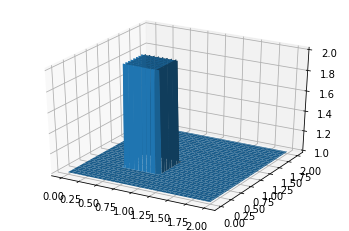

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,v[:,:,0])

In [ ]:
for n in range(nt-1):
  tempu = u[:,:,n].copy()
  tempv = v[:,:,n].copy()

  u[1:, 1:, n+1] = (tempu[1:, 1:] - tempu[1:, 1:] * dt/dx * (tempu[1:, 1:] - tempu[1:,:-1]) 
                               - tempv[1:, 1:] * dt/dy * (tempu[1:,1:] - tempu[:-1,1:]))

  v[1:, 1:, n+1] = (tempv[1:, 1:] - tempu[1:, 1:] * dt/dx * (tempv[1:, 1:] - tempv[1:,:-1]) 
                               - tempv[1:, 1:] * dt/dy * (tempv[1:,1:] - tempv[:-1,1:]))
  
  u[0,:,n+1] = 0
  u[-1,:,n+1] = 0
  u[:,0,n+1] = 0
  u[0,-1,n+1] = 0

  v[0,:,n+1] = 0
  v[-1,:,n+1] = 0
  v[:,0,n+1] = 0
  v[0,-1,n+1] = 0  

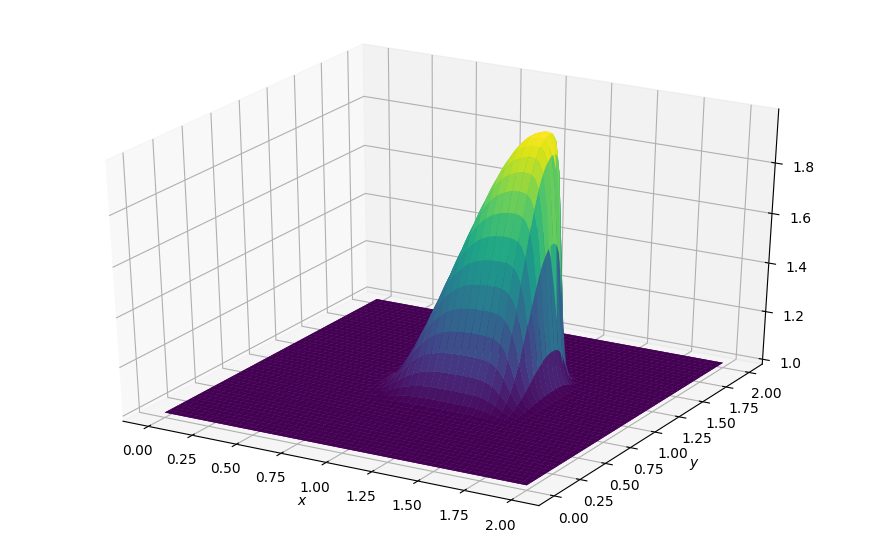

In [ ]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, v[:,:,-1], cmap=cm.viridis, rstride=2, cstride=2)
ax.plot_surface(X, Y, u[:,:,-1], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');